### Chapter 10: Deep Learning in Image Processing - Image Classification

#### Classification of MNIST using FC network with TF

---

In [50]:
import numpy as np
# import data
from keras.datasets import mnist
import tensorflow as tf
%matplotlib inline

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

np.random.seed(0)
train_indices = np.random.choice(60000, 50000, replace=False)
valid_indices = [i for i in range(60000) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices,:,:], y_train[valid_indices]
X_train, y_train = X_train[train_indices,:,:], y_train[train_indices]

print(X_train.shape, X_valid.shape, X_test.shape)

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)


In [51]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
X_train, y_train = reformat(X_train, y_train)
X_valid, y_valid = reformat(X_valid, y_valid)
X_test, y_test = reformat(X_test, y_test)
print('Training set', X_train.shape, X_train.shape)
print('Validation set', X_valid.shape, X_valid.shape)
print('Test set', X_test.shape, X_test.shape)

Training set (50000, 784) (50000, 784)
Validation set (10000, 784) (10000, 784)
Test set (10000, 784) (10000, 784)


In [52]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

In [53]:
batch_size = 256 #128
num_hidden_units = 1024
lambda1 = 0.05 #0.005 #0.01
lambda2 = 0.05 #0.005 #0.01
    
graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_valid)
    tf_test_dataset = tf.constant(X_test)
    # Variables.
    weights1 = tf.Variable(tf.random.truncated_normal([image_size * image_size, num_hidden_units]))
    biases1 = tf.Variable(tf.zeros([num_hidden_units]))

    # connect inputs to every hidden unit. Add bias
    layer_1_outputs = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

    weights2 = tf.Variable(tf.random.truncated_normal([num_hidden_units, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels])) 

    # Training computation.
    logits = tf.matmul(layer_1_outputs, weights2) + biases2
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits) + \
                            lambda1*tf.nn.l2_loss(weights1) + lambda2*tf.nn.l2_loss(weights2))  
        
    # Optimizer.
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.003).minimize(loss)
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    layer_1_outputs = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    valid_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)
    layer_1_outputs = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)  

Initialized
Minibatch loss at step 0: 68319.140625
Minibatch accuracy: 14.1%
Validation accuracy: 34.2%


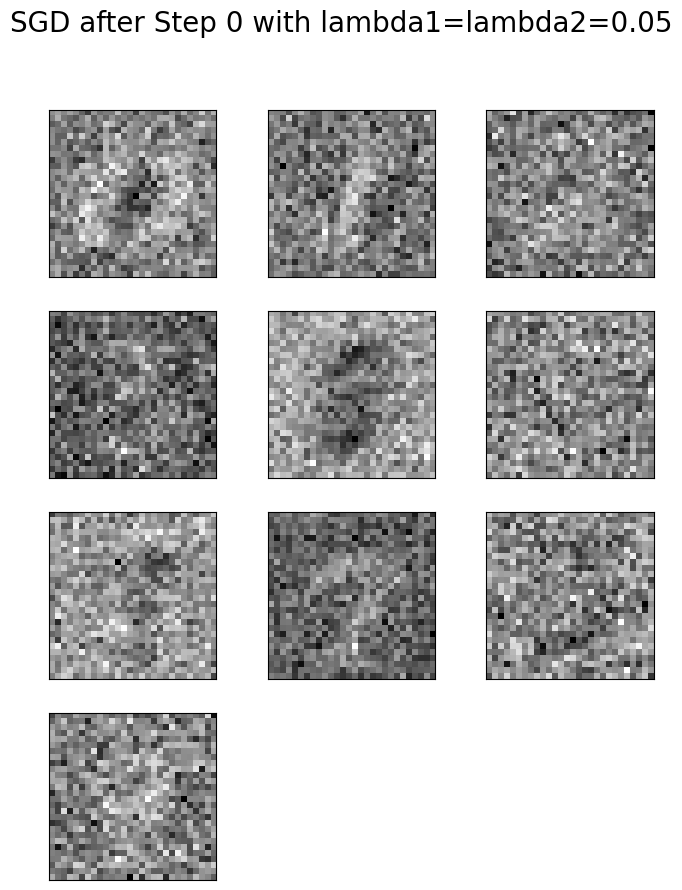

Minibatch loss at step 500: 13805.29296875
Minibatch accuracy: 93.0%
Validation accuracy: 91.4%


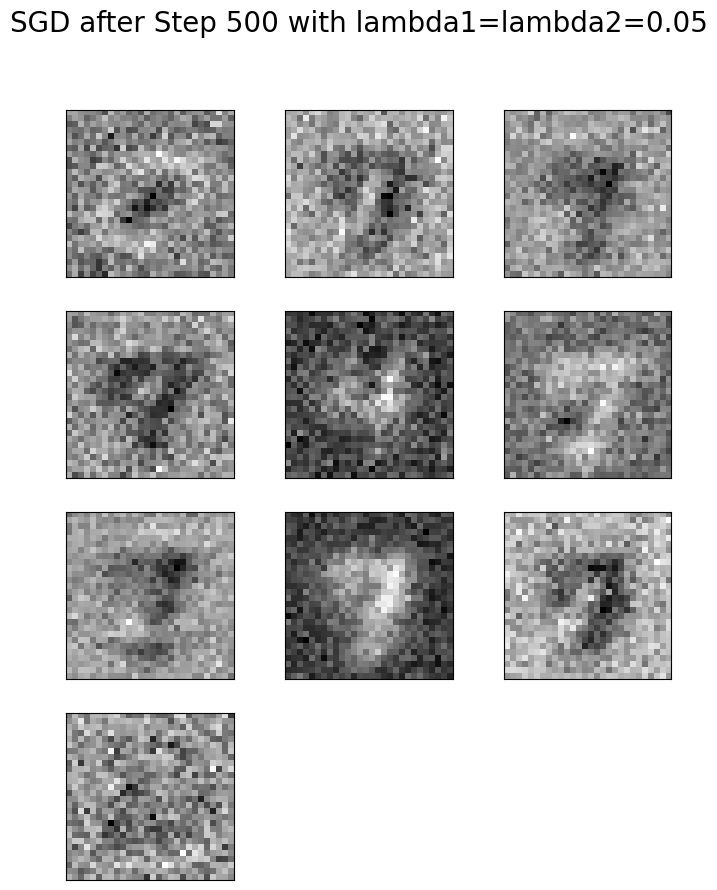

Minibatch loss at step 1000: 11836.8095703125
Minibatch accuracy: 98.0%
Validation accuracy: 92.2%


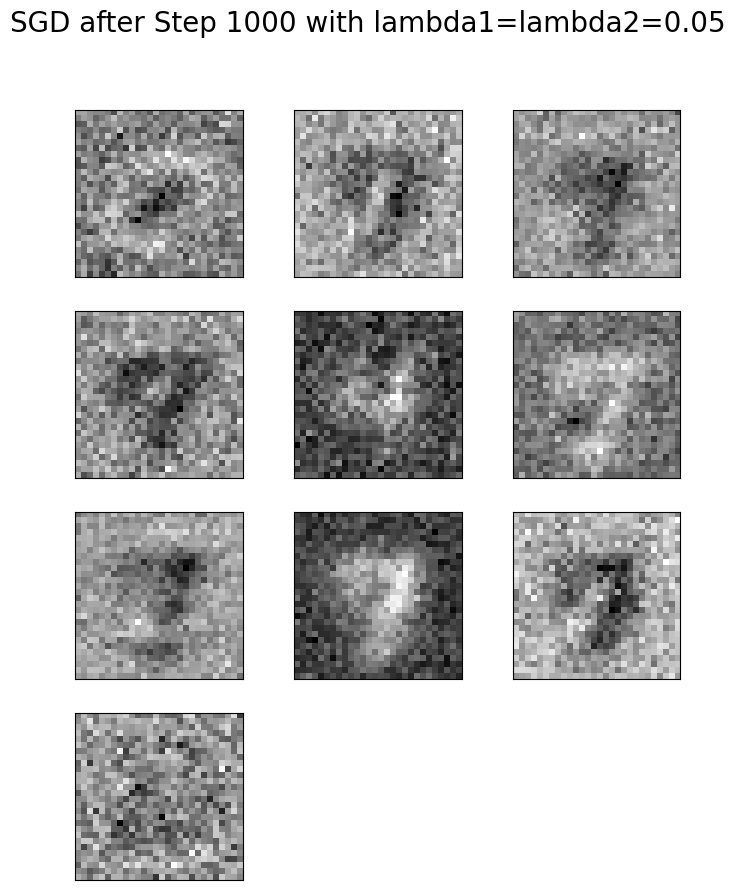

Minibatch loss at step 1500: 10190.0
Minibatch accuracy: 96.5%
Validation accuracy: 92.2%


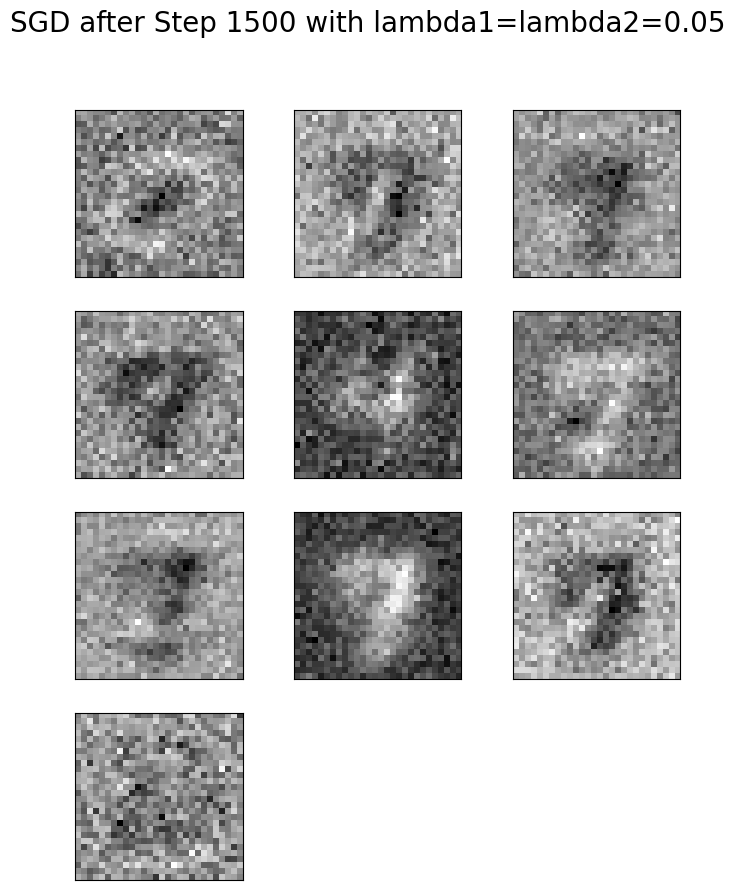

Minibatch loss at step 2000: 8762.61328125
Minibatch accuracy: 98.8%
Validation accuracy: 92.4%


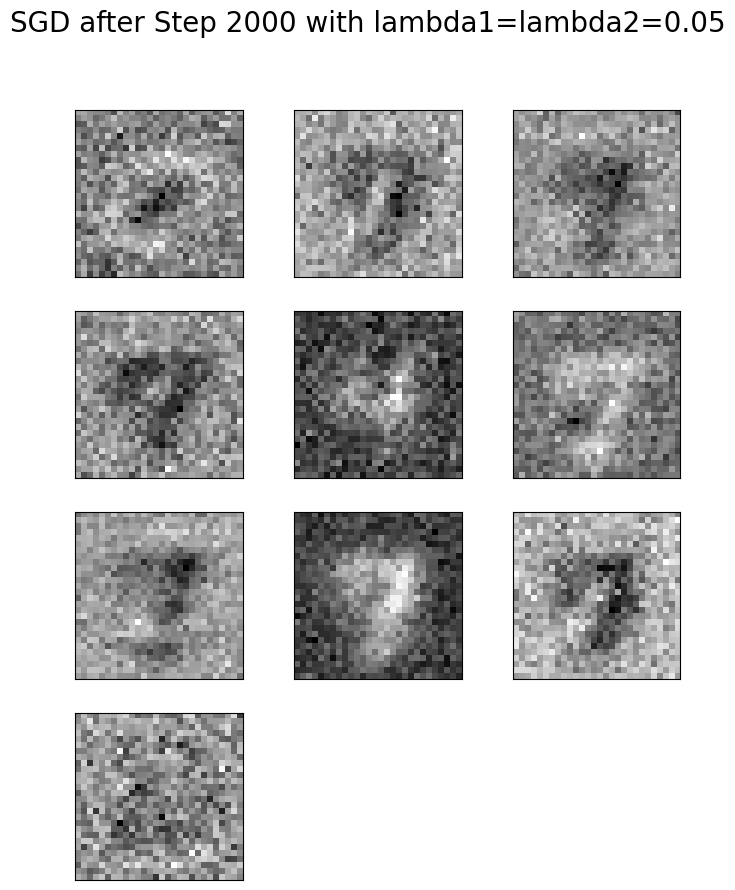

Minibatch loss at step 2500: 7541.9580078125
Minibatch accuracy: 97.7%
Validation accuracy: 92.5%


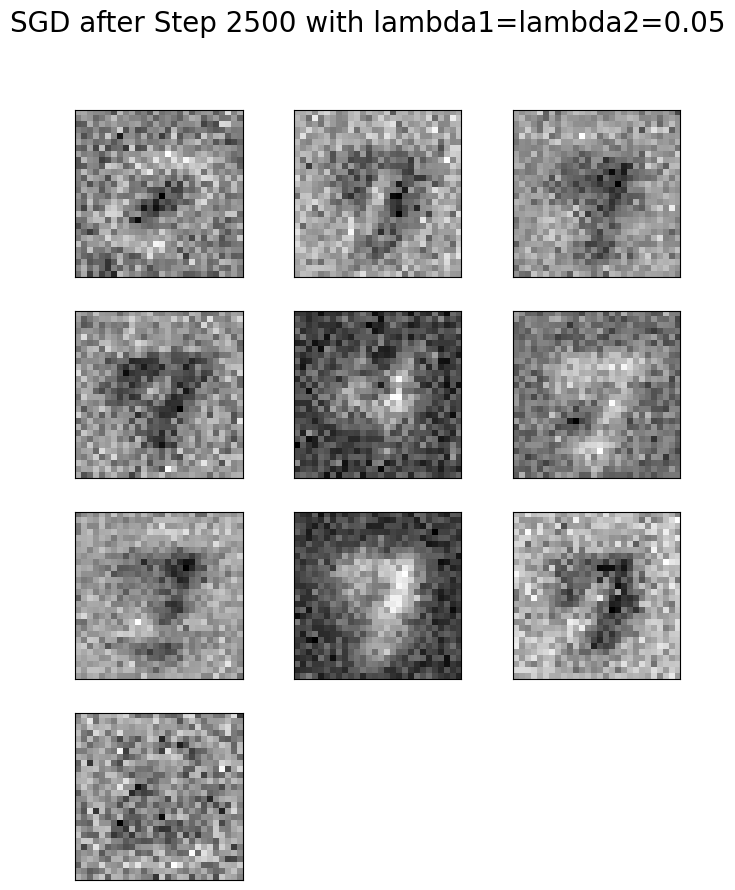

Minibatch loss at step 3000: 6491.81396484375
Minibatch accuracy: 97.7%
Validation accuracy: 92.9%


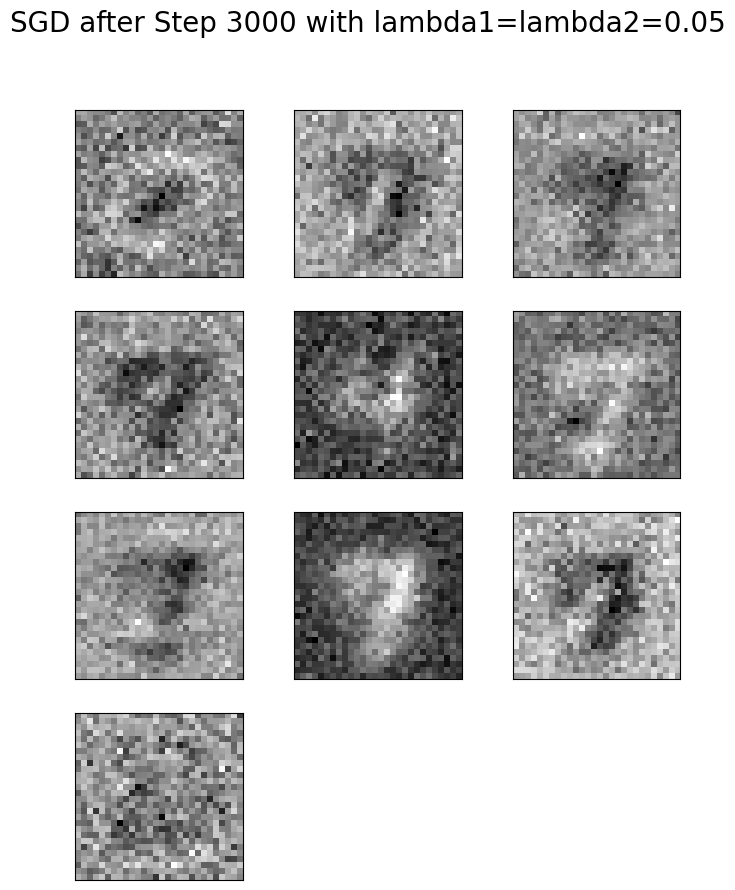

Minibatch loss at step 3500: 5586.47998046875
Minibatch accuracy: 100.0%
Validation accuracy: 92.6%


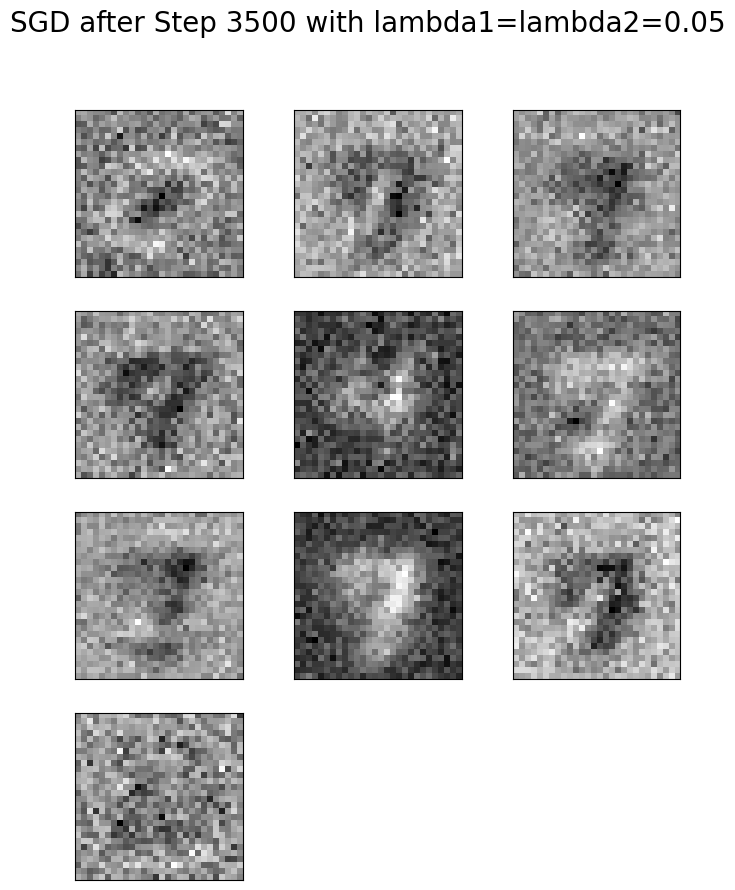

Minibatch loss at step 4000: 4808.6142578125
Minibatch accuracy: 98.8%
Validation accuracy: 92.7%


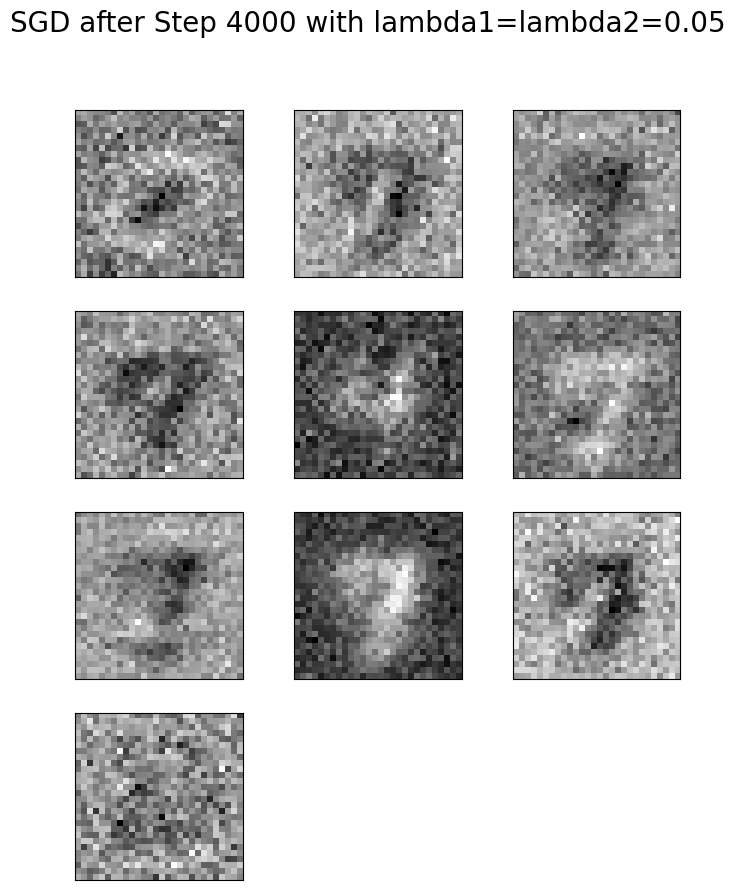

Minibatch loss at step 4500: 4138.84619140625
Minibatch accuracy: 99.2%
Validation accuracy: 92.7%


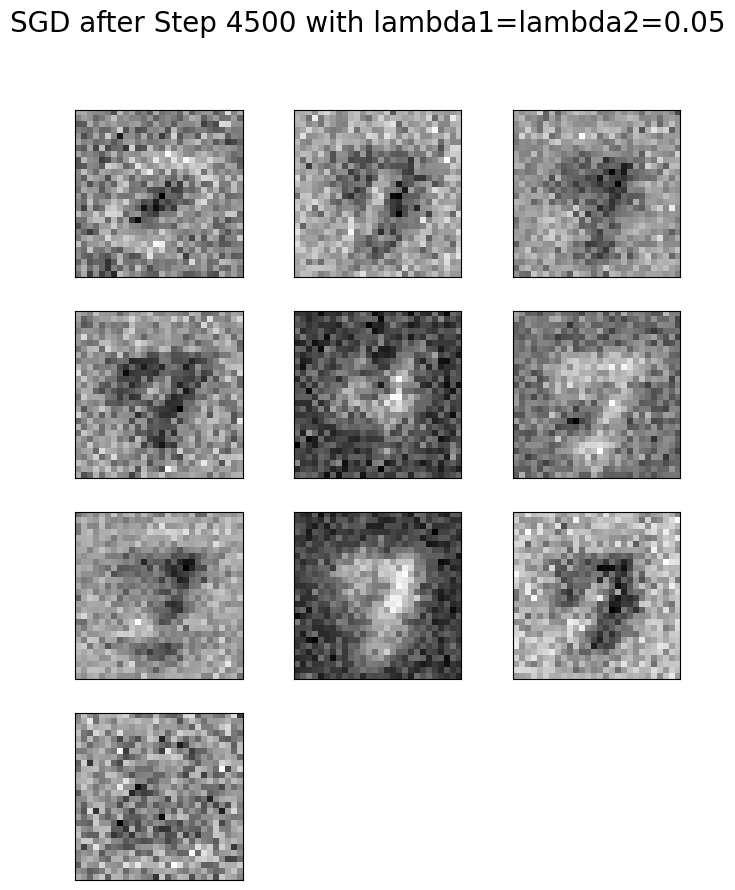

Minibatch loss at step 5000: 3561.9873046875
Minibatch accuracy: 99.6%
Validation accuracy: 92.6%


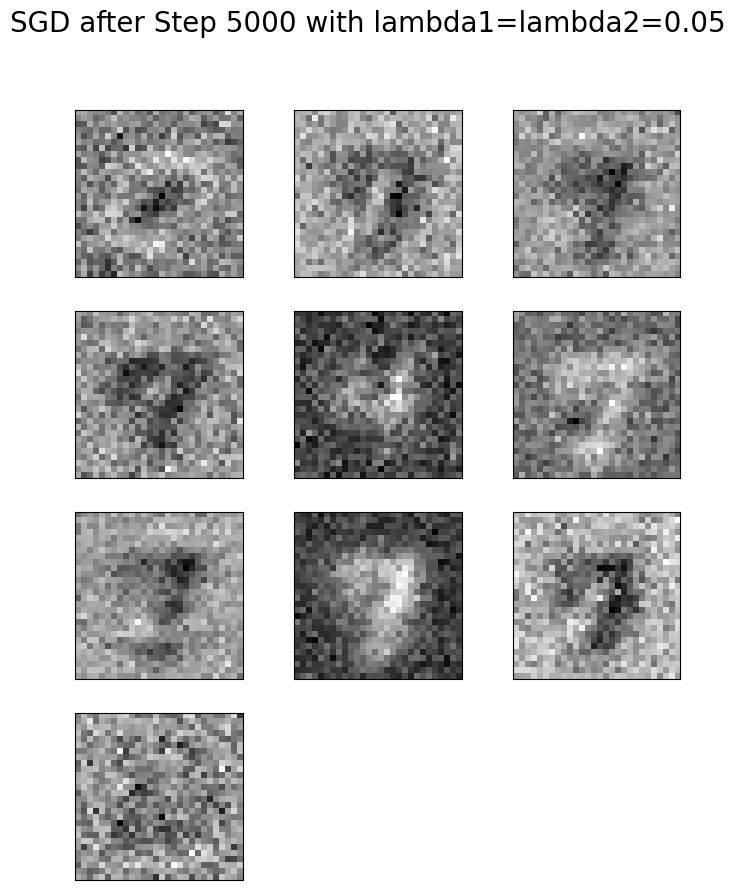

Minibatch loss at step 5500: 3065.82080078125
Minibatch accuracy: 99.6%
Validation accuracy: 92.7%


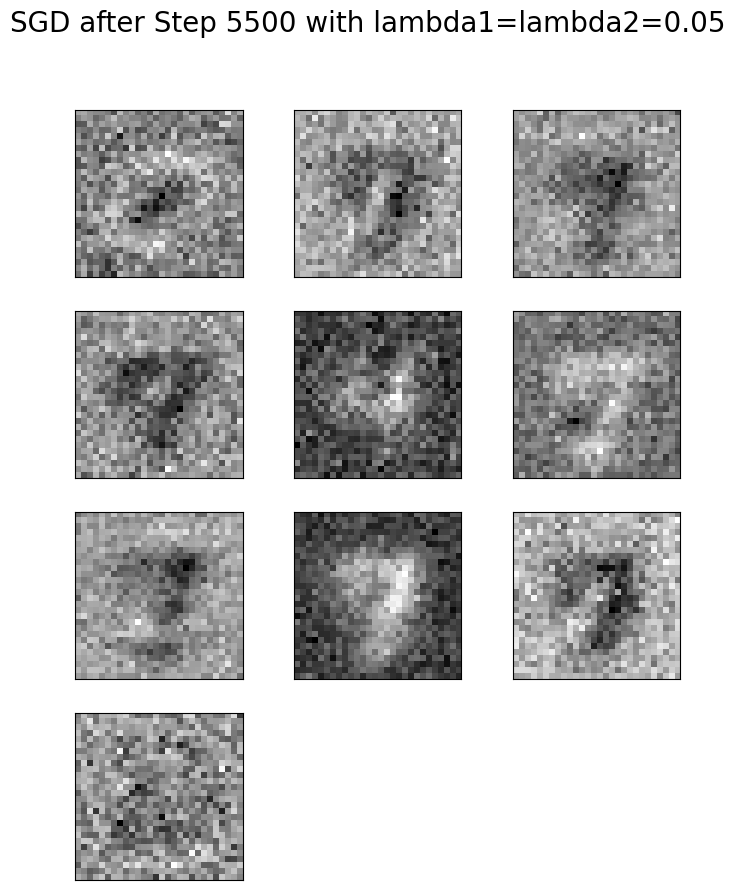

Minibatch loss at step 6000: 2638.724853515625
Minibatch accuracy: 99.6%
Validation accuracy: 92.9%


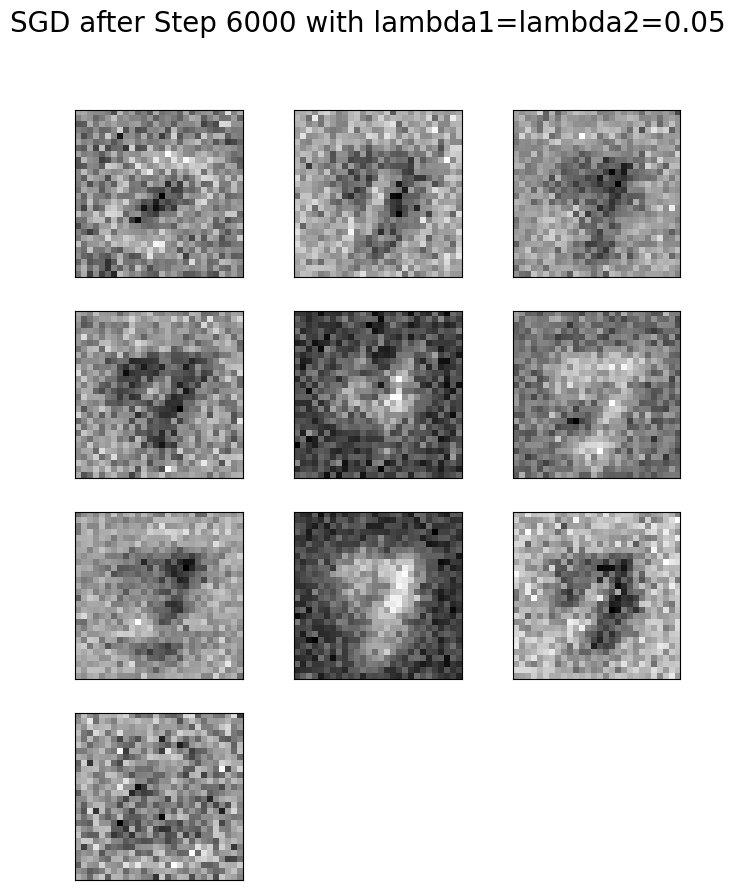

Test accuracy: 92.7%


In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

# Set number of steps for training
num_steps = 6001

# Define lists to track loss and accuracy
ll = []
atr = []
av = []

# Use compatibility mode in TensorFlow 2.x for TensorFlow 1.x syntax
with tf.compat.v1.Session(graph=graph) as session:
    # Initialize variables
    session.run(tf.compat.v1.global_variables_initializer())
    print("Initialized")
    
    for step in range(num_steps):
        # Pick an offset within the training data
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        # Generate a minibatch
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        
        # Create feed dictionary for placeholders
        feed_dict = {tf_train_dataset: batch_data, tf_train_labels: batch_labels}
        
        # Run session to train
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        # Print and record metrics at intervals
        if step % 500 == 0:
            ll.append(l)
            minibatch_accuracy = accuracy(predictions, batch_labels)
            atr.append(minibatch_accuracy)
            print(f"Minibatch loss at step {step}: {l}")
            print(f"Minibatch accuracy: {minibatch_accuracy:.1f}%")
            
            # Validation accuracy
            validation_accuracy = accuracy(valid_prediction.eval(session=session), y_valid)
            av.append(validation_accuracy)
            print(f"Validation accuracy: {validation_accuracy:.1f}%")
            
            # Visualize weights
            images = weights1.eval(session=session) @ weights2.eval(session=session)
            plt.figure(figsize=(8, 10))
            for j in range(10):
                plt.subplot(4, 3, j + 1)
                plt.imshow(np.reshape(images[:, j], (image_size, image_size)), cmap='gray')
                plt.xticks([]), plt.yticks([])
                
            plt.suptitle(f'SGD after Step {step} with lambda1=lambda2={lambda1}', size=20)
            plt.show()
    
    # Test accuracy
    test_accuracy = accuracy(test_prediction.eval(session=session), y_test)
    print(f"Test accuracy: {test_accuracy:.1f}%")


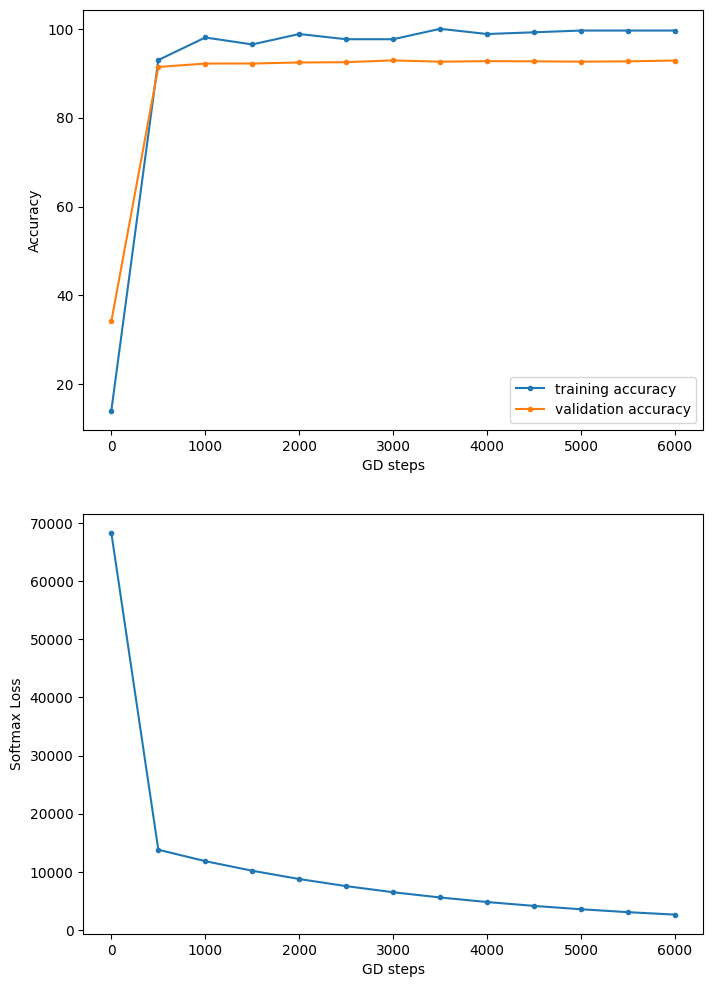

In [55]:
plt.figure(figsize=(8,12))
plt.subplot(211) 
plt.plot(range(0,6001,500), atr, '.-', label='training accuracy')
plt.plot(range(0,6001,500), av, '.-', label='validation accuracy')
plt.xlabel('GD steps')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(212) 
plt.plot(range(0,6001,500), ll, '.-')
plt.xlabel('GD steps')
plt.ylabel('Softmax Loss')
plt.show()